# Assignment 1

### Scott Thoesen
### OPTI 556

#### initialization code

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
from numpy import vectorize
from scipy import signal
from scipy import integrate
from skimage import color, data, restoration, exposure, transform
from skimage import io
import ipywidgets as widgets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pywt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
import scipy.integrate as integrate
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})

## Fourier Series Estimation of a Signal
This section corresponds to the first portion of the assignment. Contained is an analysis of Fourier series estimation using each of the following function classes: Ramp, Box Car, Square Wave, and Full-Wave Rectified sine. The analysis is performed using 5, 10, 20, and 40 Fourier coefficients.

### Signal 1: Ramp
The Ramp function is defined as
$$
f(x)=\left \lbrace {
    \begin{aligned}
        0~&\text{ for }~x<0\\
        x~&\text{ for }~0\leq x<1\\
        0~&\text{ for }~x\geq 1
    \end{aligned}}\right.
$$

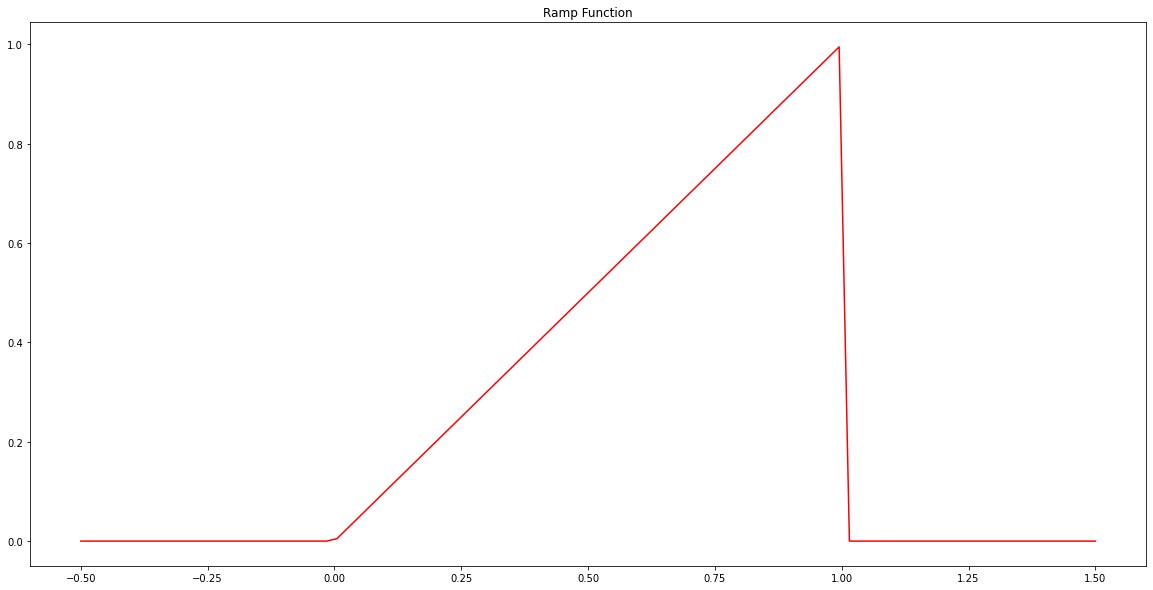

In [ ]:
def f(x):
  if x<0:
    f=0.
  elif x<1:
    f=x
  else:
    f=0.
  return f
  
xLower = -.5;
xUpper = 1.5;
xrange=np.linspace(xLower,xUpper,100);

vf = vectorize(f)

fig = plt.figure()
plt.plot(xrange,vf(xrange),'r')
plt.title("Ramp Function")
plt.savefig('rampFS.png')

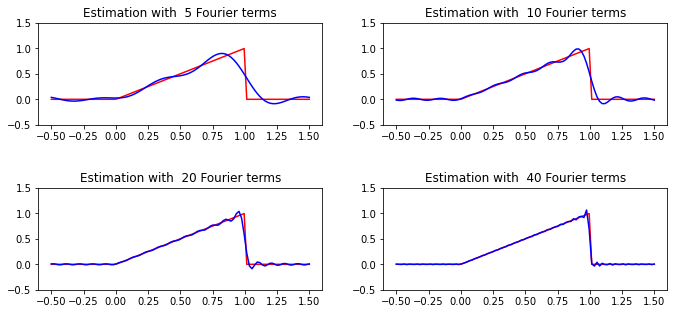

In [ ]:
pt=0;
plt.subplots(figsize=(10,5))

N = abs(xUpper - xLower)

for coeffs in [5, 10, 20, 40]:
  pt=pt+1
  sv=np.zeros(coeffs)
  cv=np.zeros(coeffs)
  for pop in np.arange(coeffs):
    sv[pop]=2*integrate.quad(lambda x: vf(x)*np.sin(2*np.pi*pop*x/N), xLower, xUpper)[0]
    cv[pop]=2*integrate.quad(lambda x: vf(x)*np.cos(2*np.pi*pop*x/N), xLower, xUpper)[0]
    cv[0]=cv[0]
    def px(x,sv,cv):
      pxx=0;
      for pop in np.arange(len(sv)):
        pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x/N)+cv[pop]*np.cos(2*np.pi*pop*x/N)
      return pxx
  plt.subplot(2, 2, pt)
  pxScaled = (px(xrange,sv,cv)-cv[0]/2)/N
  plt.plot(xrange,vf(xrange),'r',xrange,pxScaled,'b')
  plt.ylim(xLower, xUpper) 
  plt.title("Estimation with  %i Fourier terms" %(pop+1))
  plt.tight_layout(pad=3)
  plt.savefig('rampFSexpansion.png')

The following are observations made on the Fourier series expansion of a Ramp function (with trailing ends):
1. Most of the low-frequency content, near the ramp base, is adequately approximated using only a few terms/coefficients. As the function approaches the ramp peak, the Fourier estimation begins to fall apart. This behavior is more pronounced when less terms are used.
2. Increasing the number of coefficients has this "stacking" effect near the peak where more and more high-frequency sinusoids add to better represent the sharp detail. This effect is not as great closer to the base.
3. Gibbs Phenomenon can be observed near discontinuities and appears as high-frequency "ringing".

### Signal 2: Box Car
The Box Car function is defined as
$$
f(x)=\left \lbrace {
    \begin{aligned}
        0~&\text{ for }~x<0\\
        1~&\text{ for }~0\leq x<1\\
        0~&\text{ for }~x\geq 1
    \end{aligned}}\right.
$$

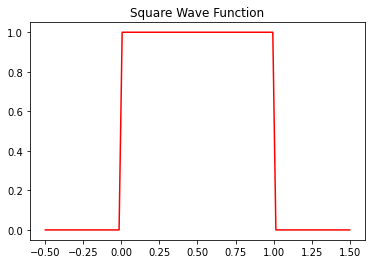

In [ ]:
def f(x):
  if x<0:
    f=0.
  elif x<1:
    f=1.
  else:
    f=0.
  return f
  
vf = vectorize(f)

xLower = -.5;
xUpper = 1.5;

xrange=np.linspace(xLower,xUpper,100);

yLower = min(vf(xrange))
yUpper = max(vf(xrange))

fig = plt.figure()
plt.plot(xrange,vf(xrange),'r')
plt.title("Square Wave Function")
plt.savefig('sqwaveFS.png')

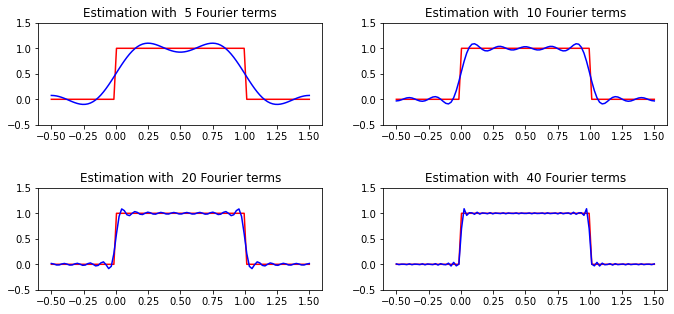

In [ ]:
pt=0;
plt.subplots(figsize=(10,5))

N = abs(xUpper - xLower)

for coeffs in [5, 10, 20, 40]:
  pt=pt+1
  sv=np.zeros(coeffs)
  cv=np.zeros(coeffs)
  for pop in np.arange(coeffs):
    sv[pop]=2*integrate.quad(lambda x: vf(x)*np.sin(2*np.pi*pop*x/N), xLower, xUpper)[0]
    cv[pop]=2*integrate.quad(lambda x: vf(x)*np.cos(2*np.pi*pop*x/N), xLower, xUpper)[0]
    cv[0]=cv[0]
    def px(x,sv,cv):
      pxx=0;
      for pop in np.arange(len(sv)):
        pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x/N)+cv[pop]*np.cos(2*np.pi*pop*x/N)
      return pxx
  plt.subplot(2, 2, pt)
  pxScaled = (px(xrange,sv,cv)-cv[0]/2)/N
  plt.plot(xrange,vf(xrange),'r',xrange,pxScaled,'b')
  plt.ylim(xLower, xUpper) 
  plt.title("Estimation with  %i Fourier terms" %(pop+1))
  plt.tight_layout(pad=3)
  plt.savefig('rampFSexpansion.png')

The following are observations made on the Fourier series expansion of a Box Car function:
1. This function is comprised mostly of "DC" energy at different offsets/discontinuities. The discontinuities, however, introduce high frequency content that "disturb" the DC sections in such a way that Fourier estimation using a lot of coefficients is necessary for adequate representation of the function.
2. Gibbs Phenomenon can be observed near discontinuities and appears as high-frequency "ringing".

### Signal 3: Square Wave
The Square Wave function is defined as
$$
f(x)=\left \lbrace {
    \begin{aligned}
        0~&\text{ for }~x<0\\
        0.5~&\text{ for }~0\leq x<0.5\\
       -0.5~&\text{ for }~0.5\leq x<1\\
        0~&\text{ for }~x\geq 1
    \end{aligned}}\right.
$$

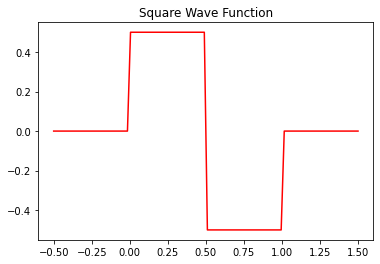

In [ ]:
def f(x):
  if x<0:
    f=0.
  elif x<0.5:
    f=0.5
  elif x<1:
    f=-0.5
  else:
    f=0.
  return f

vf = vectorize(f)

xLower = -.5;
xUpper = 1.5;

xrange=np.linspace(xLower,xUpper,100);

yLower = min(vf(xrange))
yUpper = max(vf(xrange))

fig = plt.figure()
plt.plot(xrange,vf(xrange),'r')
plt.title("Square Wave Function")
plt.savefig('sqwaveFS.png')

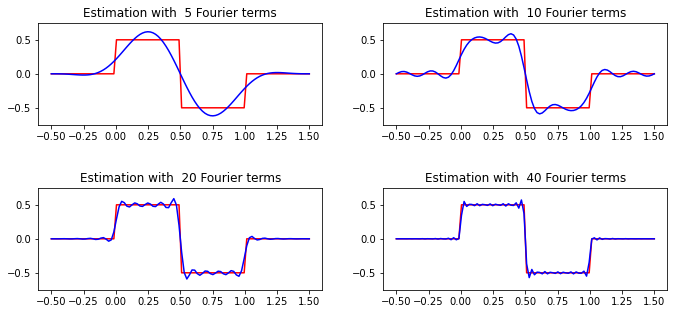

In [ ]:
pt=0;
plt.subplots(figsize=(10,5))

N = abs(xUpper - xLower)

for coeffs in [5, 10, 20, 40]:
  pt=pt+1
  sv=np.zeros(coeffs)
  cv=np.zeros(coeffs)
  for pop in np.arange(coeffs):
    sv[pop]=2*integrate.quad(lambda x: vf(x)*np.sin(2*np.pi*pop*x/N), xLower, xUpper)[0]
    cv[pop]=2*integrate.quad(lambda x: vf(x)*np.cos(2*np.pi*pop*x/N), xLower, xUpper)[0]
    cv[0]=cv[0]
    def px(x,sv,cv):
      pxx=0;
      for pop in np.arange(len(sv)):
        pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x/N)+cv[pop]*np.cos(2*np.pi*pop*x/N)
      return pxx
  plt.subplot(2, 2, pt)
  pxScaled = (px(xrange,sv,cv)-cv[0]/2)/N
  plt.plot(xrange,vf(xrange),'r',xrange,pxScaled,'b')

  vPad = 1.5

  plt.ylim(yLower*vPad, yUpper*vPad) 
  plt.title("Estimation with  %i Fourier terms" %(pop+1))
  plt.tight_layout(pad=3)
  plt.savefig('rampFSexpansion.png')

The following are observations made on the Fourier series expansion of a Square Wave function:
1. Using only a few terms, one can see the series almost resembles a Gaussian followed by an inverted Gaussian with some offset. There seems to be a relationship between this observation and the somewhat crude, lowpass structure of the function.
2. Gibbs Phenomenon can be observed near the discontinuities.

### Signal 4: Full-Wave Rectified Sine
The Full-Wave Rectified Sine function is defined as
$$
f(x)=\left \lvert { sin(2\pi f x) } \rvert \right.
$$

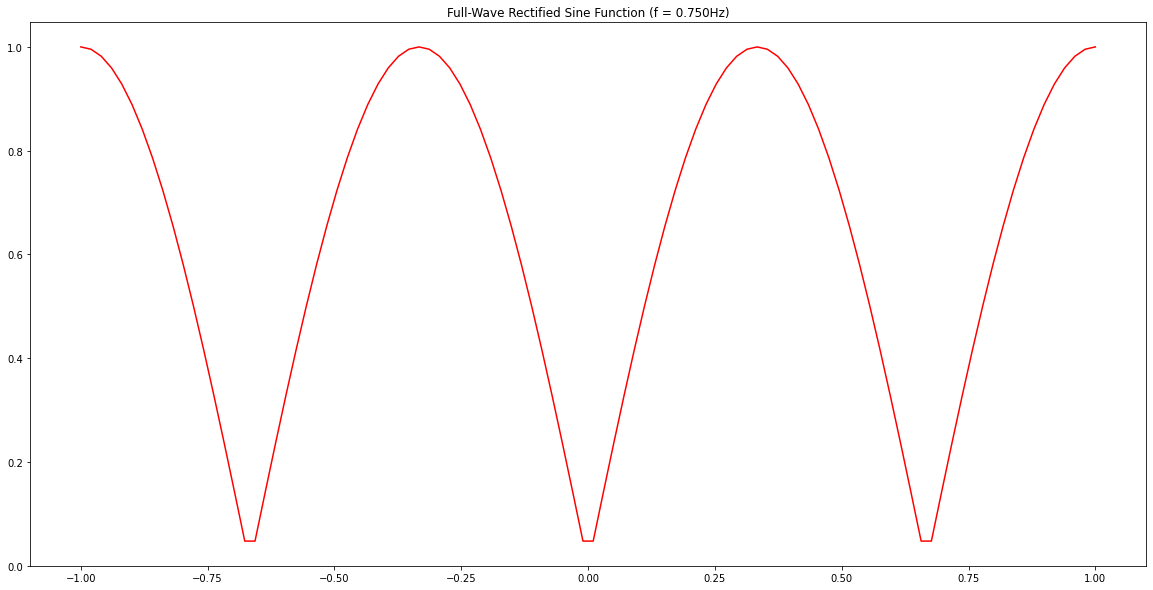

In [ ]:
xLower = -1;
xUpper = 1;

xrange=np.linspace(xLower,xUpper,100);

f = 3/4
def vf(x):
  fxx=abs(np.sin(2*np.pi*(x)*f))
  return fxx

yLower = min(vf(xrange))
yUpper = max(vf(xrange))
  
fig = plt.figure()
plt.plot(xrange,vf(xrange),'r')
plt.title("Full-Wave Rectified Sine Function (f = %0.3fHz)" %(f))
plt.savefig('rectsineFS.png')

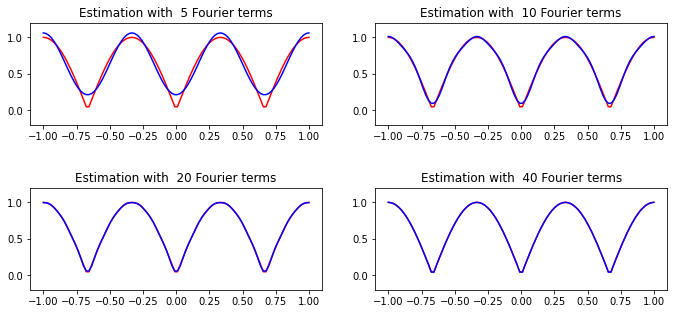

In [ ]:
pt=0;
plt.subplots(figsize=(10,5))

N = abs(xUpper - xLower)

for coeffs in [5, 10, 20, 40]:
  pt=pt+1
  sv=np.zeros(coeffs)
  cv=np.zeros(coeffs)
  for pop in np.arange(coeffs):
    sv[pop]=2*integrate.quad(lambda x: vf(x)*np.sin(2*np.pi*pop*x/N), xLower, xUpper)[0]
    cv[pop]=2*integrate.quad(lambda x: vf(x)*np.cos(2*np.pi*pop*x/N), xLower, xUpper)[0]
    cv[0]=cv[0]
    def px(x,sv,cv):
      pxx=0;
      for pop in np.arange(len(sv)):
        pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x/N)+cv[pop]*np.cos(2*np.pi*pop*x/N)
      return pxx
  plt.subplot(2, 2, pt)
  pxScaled = (px(xrange,sv,cv)-cv[0]/2)/N
  plt.plot(xrange,vf(xrange),'r',xrange,pxScaled,'b')

  plt.ylim(-0.2, 1.2) 
  plt.title("Estimation with  %i Fourier terms" %(pop+1))
  plt.tight_layout(pad=3)
  plt.savefig('rampFSexpansion.png')

The following are observations made on the Fourier series expansion of a Full-Wave Rectified Sine function:
1. The series approximation converges much faster, using less coefficients than the other function categories. This is likely due to the function itself being a sine wave, which, if not rectified, can be completely represented by a single coefficient.
2. The nulls created by the absolute value introduce spectral content with much higher frequencies than that of the sine wave proper. Higher-order coefficients are thus needed to better represent these features.

## Signal Sampling and Interpolation
This section corresponds to the second portion of the assignment. Various signal types are generated, their DFT's analyzed, and reconstructed from samples using various sampling periods.

The following signals are used: superposition of harmonics, Triangle Wave, signal 3, and signal 4.

### Signal 1: Harmonic Superposition
The following equation is a superposition of 3 odd harmonics with a fundamental frequency of 1Hz:

$$
f(x)=e^{-2\pi (x) j} + \frac{1}{3}e^{-2\pi (3x) j} + \frac{1}{5}e^{-2\pi (5x) j}
$$

This equation is defined on the interval $[0,1]$.

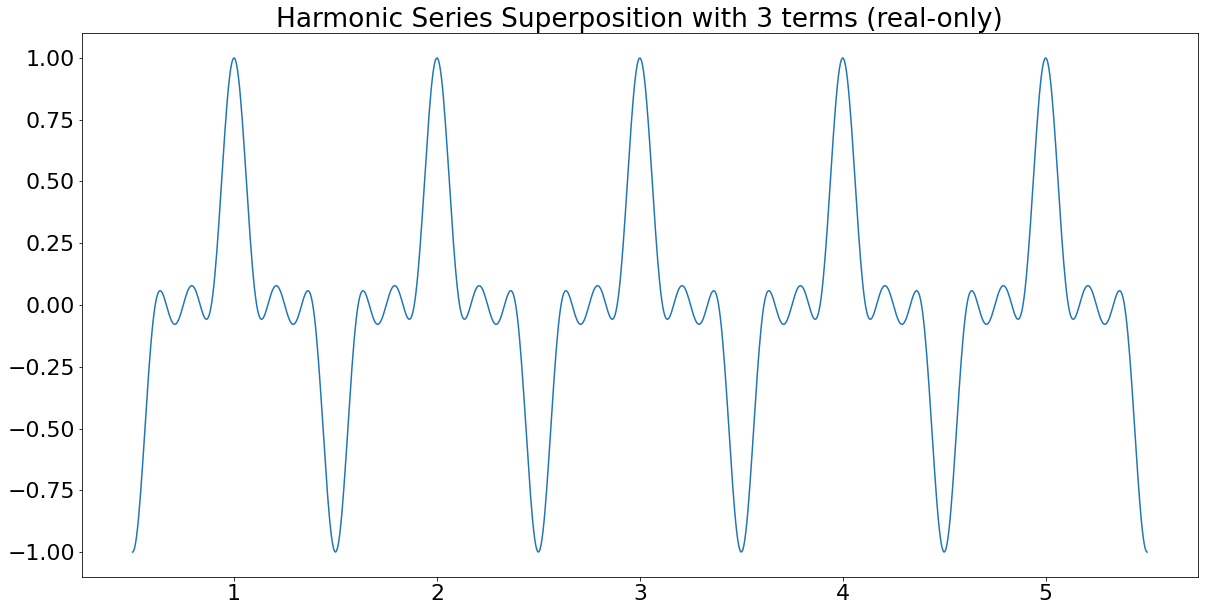

In [ ]:
numElems = 1000
xLower = 0.5
xUpper = 5.5
xRange = xUpper - xLower
xElems = np.linspace(xLower, xUpper, numElems)

def fx(x):
  fxx = np.exp(2*np.pi*x*1j) + (1/3)*np.exp(2*np.pi*3*x*1j) + (1/5)*np.exp(2*np.pi*5*x*1j)
  return fxx

plt.plot(xElems, np.real(fx(xElems)))
plt.title("Harmonic Series Superposition with 3 terms (real-only)")

plt.savefig('harmonicSeriesWave.png')

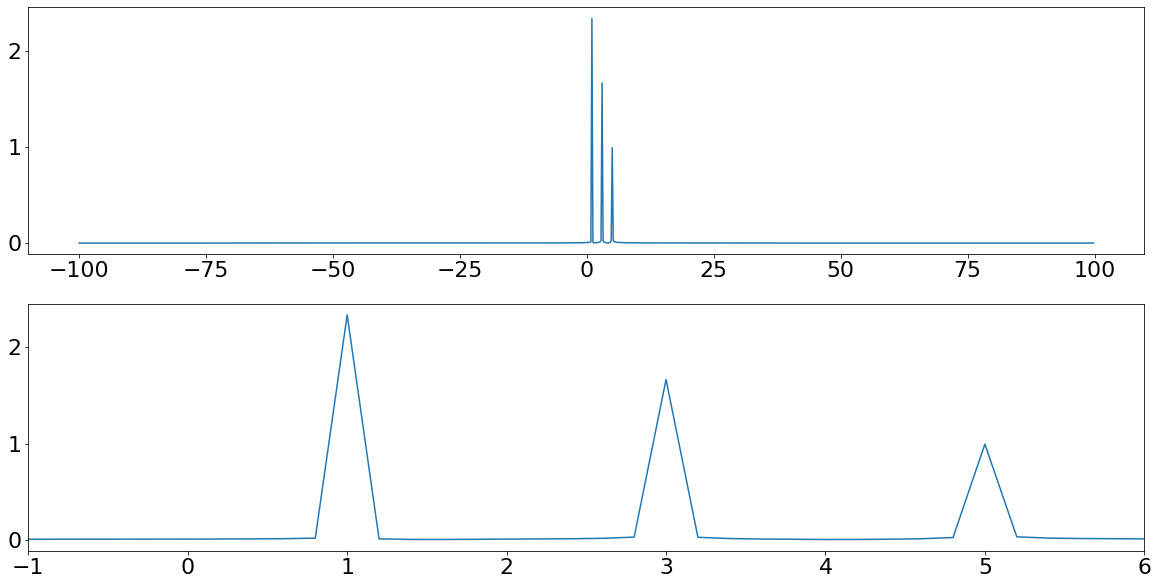

In [ ]:
urange=np.arange(-numElems/2./xRange,numElems/2./xRange,1./xRange)
urange = urange[0:numElems]

plt.subplot(2,1,1)
plt.plot(urange,abs((1./(urange[-1]-urange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(xElems)))))))
plt.subplot(2,1,2)
plt.plot(urange,abs((1./(urange[-1]-urange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(xElems)))))))
plt.xlim(-1,6)

plt.savefig('harmonicSeriesDFT.png')

The following observations are made about the DFT:

1. It is one-sided because of the complex exponentials in the equation.
2. Modes appear at 1Hz, 3Hz, and 5Hz; they correspond to the fundamental and harmonic frequencies of the equation.
3. Even though harmonics are single values, and should appear as delta functions in the frequency domain, there is clearly energy in nearby frequencies. This is due to the finite spatial resolution imposed by the sampling period that translates to finite frequency resolution in the DFT-frequency domain. In other words, finite spatial resolution translates to "uncertainty" in frequency.
4. The signal is 10x oversampled

#### 1.5x Oversample
The signal is sufficiently oversampled at rate $\delta x$. To be above Nyquist, we might set $\delta x=\frac{1}{15}$, corresponding to $B=5$. A plot of the sampled values looks like this

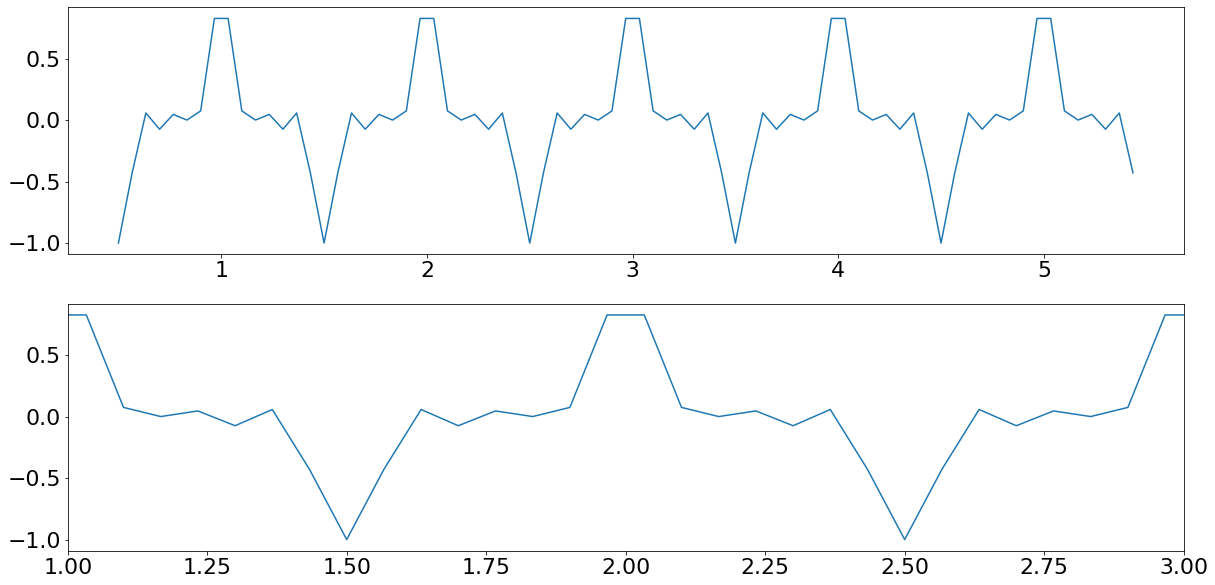

In [ ]:
srange=np.arange(xLower,xUpper,1/(2*5*1.5))

plt.subplot(2,1,1)
plt.plot(srange,fx(srange))
plt.subplot(2,1,2)
plt.plot(srange,fx(srange))
plt.xlim(1,3)

plt.savefig('harmonicSeriesDFT.png')

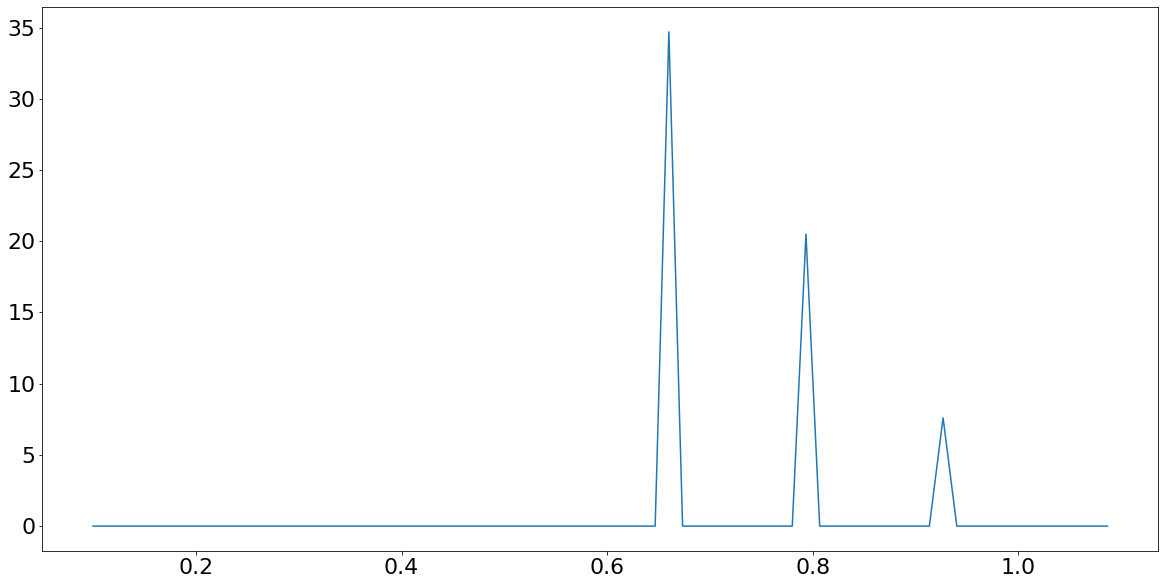

In [ ]:
usrange=np.arange(xLower/xRange,xUpper/xRange,1/(2*5*1.5)/xRange)
plt.plot(usrange,abs((1./(usrange[-1]-usrange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(srange)))))))
plt.savefig('harmonicGaussianSampleFT.png')

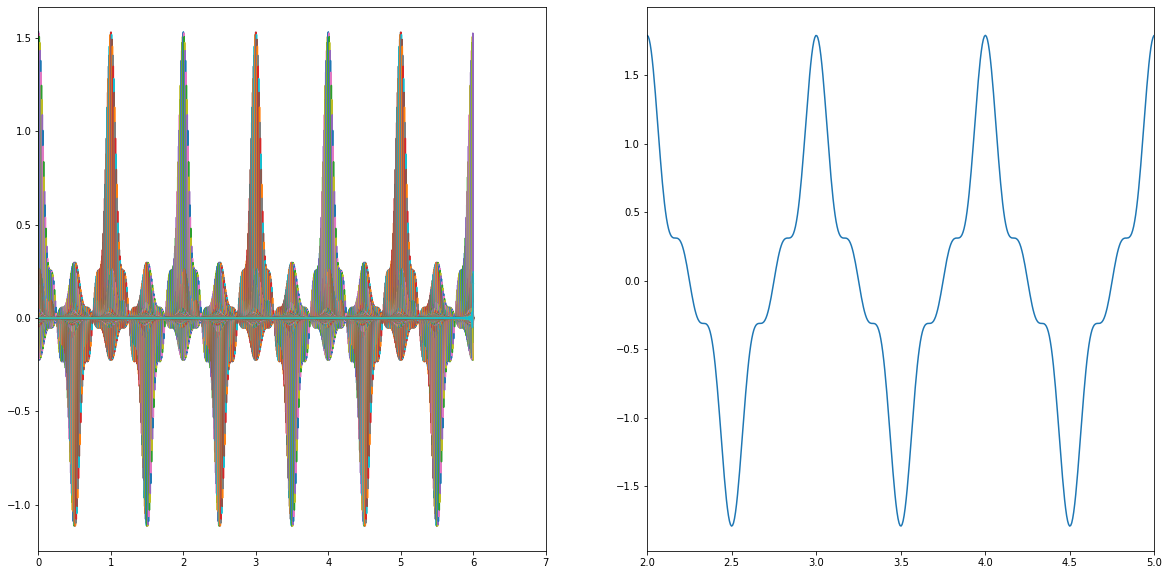

In [ ]:
interP=np.zeros(1000)
for pip in np.arange(len(srange)):
  plt.subplot(1,2,1)
  plt.plot(xElems,fx(srange[pip])*np.sinc((usrange[-1]-usrange[0])*(xElems-srange[pip])))
  interP=interP+fx(srange[pip])*np.sinc((usrange[-1]-usrange[0])*(xElems-srange[pip]))
plt.xlim(0,7)
plt.subplot(1,2,2)
plt.plot(xElems,interP)
plt.xlim(2,5)
plt.savefig('harmonicGaussianInterp.png')

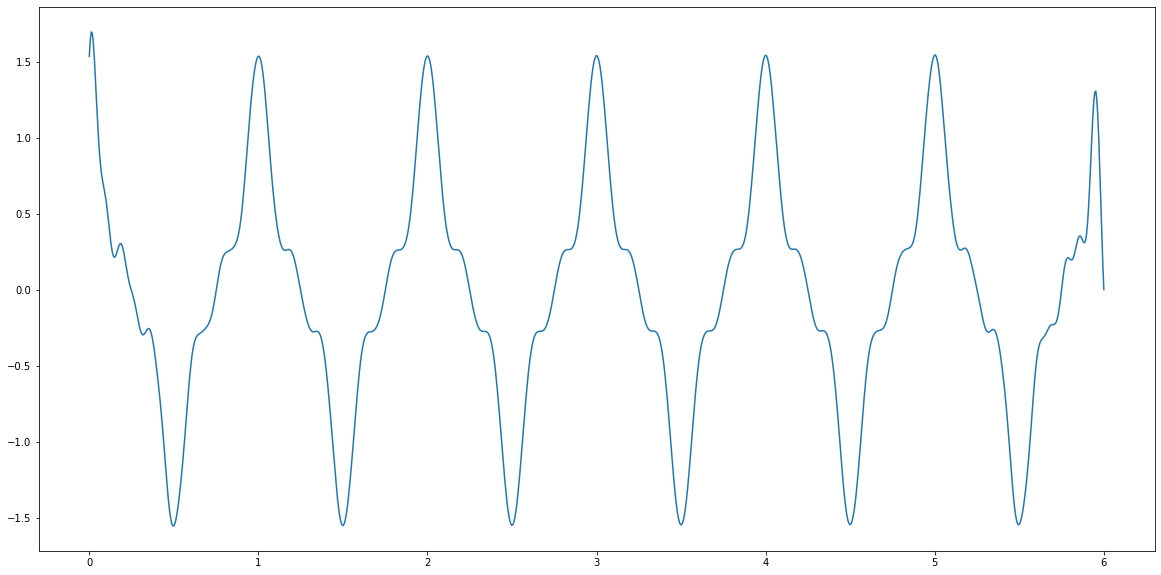

In [ ]:
plt.plot(xElems,interP)

### Signal 2: Triangle Wave
The Triangle Wave is defined on the interval $[0,1]$ as a Sawtooth Wave shifted in phase by 0.5. The equation for a Triangle Wave is

$$
f(x)=2\left\vert \frac{t}{p}-\left\lfloor\frac{t}{p}+\frac{1}{2}\right\rfloor\right\vert
$$

This function is <b><em>not</em></b> bandlimited and thus cannot be fully reconstructed from finite samples; however, approximations can get close.

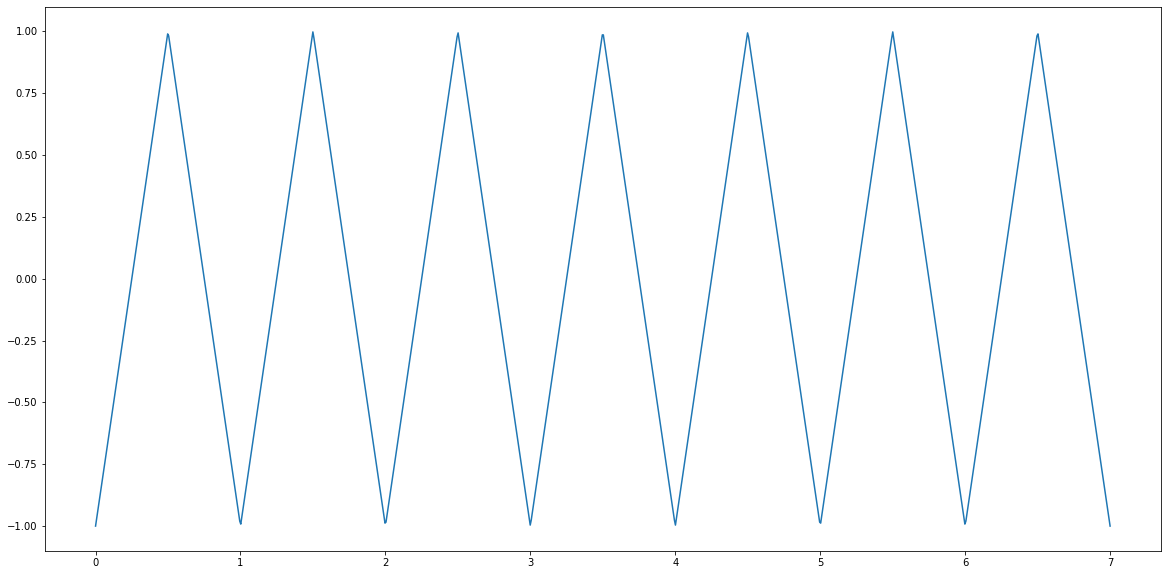

In [ ]:
xrange = np.linspace(0, 7, 1000)

def fx(x):
  fxx = signal.sawtooth(2 * np.pi * 1 * x, 0.5)
  return fxx

plt.plot(xrange, fx(xrange))

plt.savefig('triangleWave.png')

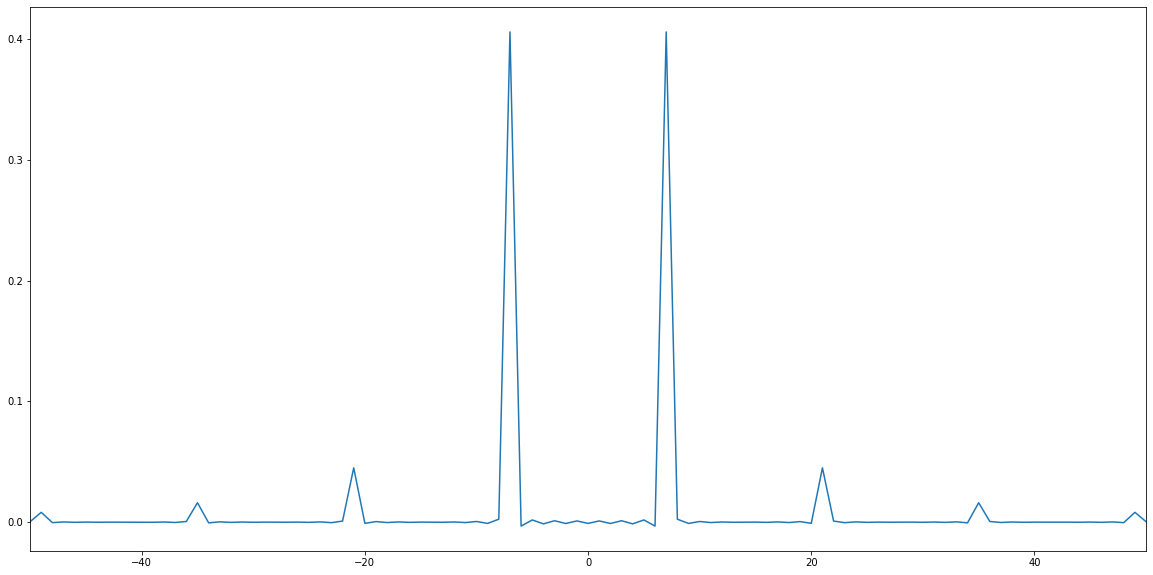

In [ ]:
urange=np.arange(-500.,500.,1.)
plt.plot(urange,(1./(urange[-1]-urange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(xrange))))))
plt.xlim(-50,50)
plt.savefig('harmonicGaussianFT.png')

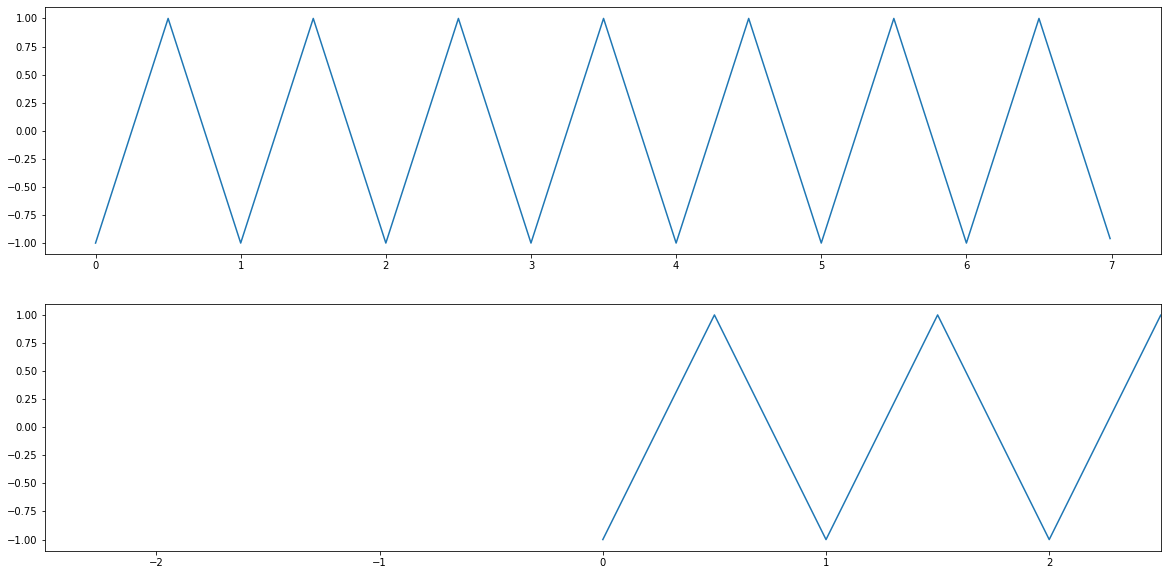

In [ ]:
srange=np.arange(0,7,.01)
plt.subplot(2,1,1)
plt.plot(srange,fx(srange))
plt.subplot(2,1,2)
plt.plot(srange,fx(srange))
plt.xlim(-2.5,2.5)
plt.savefig('harmonicGaussianSample.png')

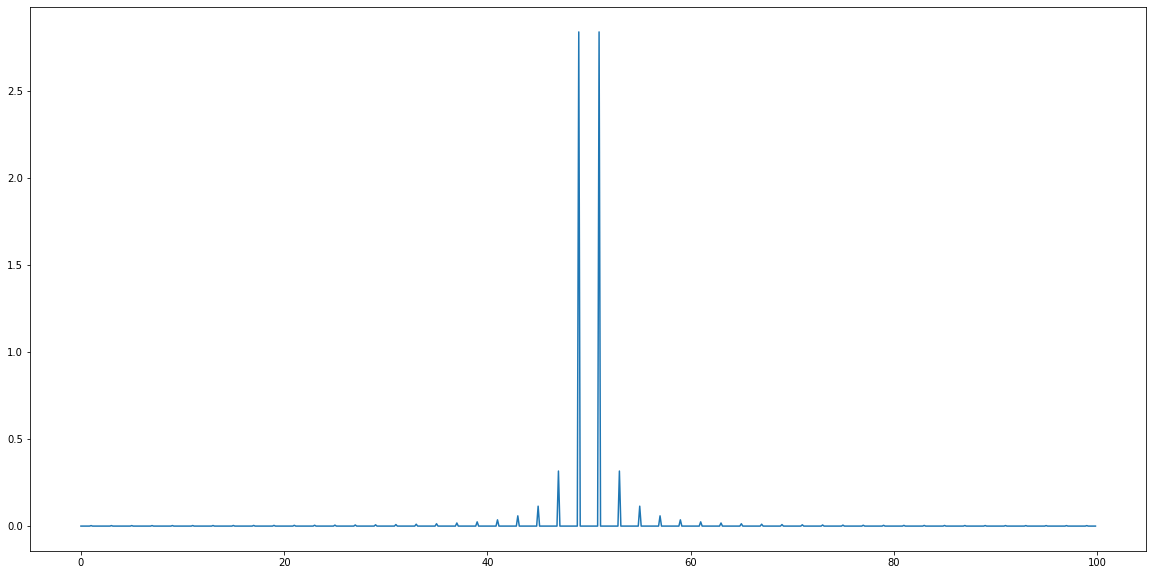

In [ ]:
usrange=srange/(.01*7.)
plt.plot(usrange,(1./(usrange[-1]-usrange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(srange))))))
plt.savefig('harmonicGaussianSampleFT.png')

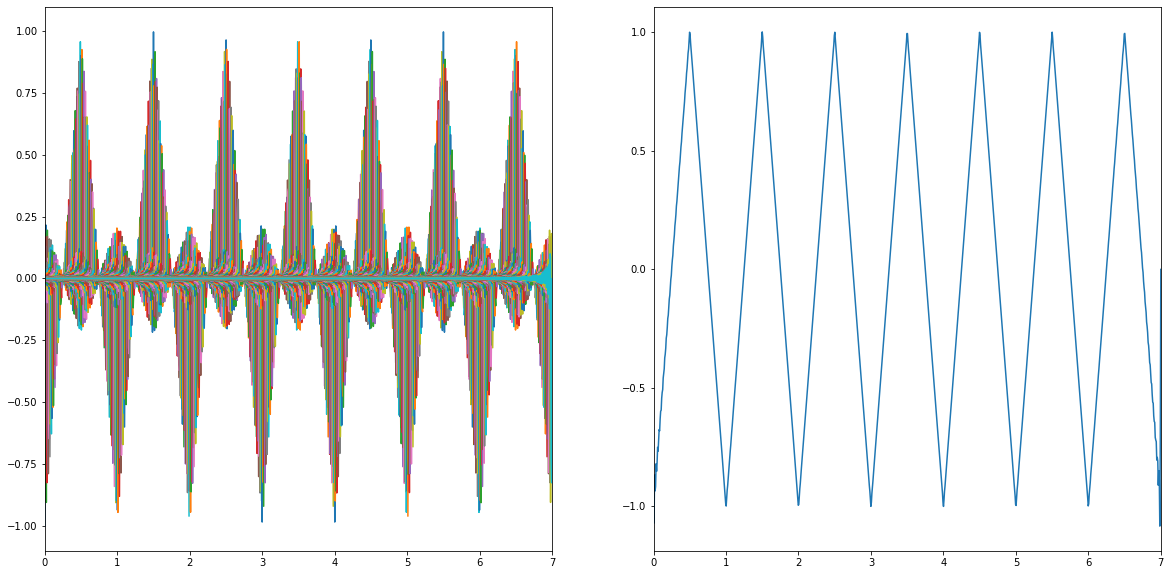

In [ ]:
interP=np.zeros(1000)
for pip in np.arange(len(srange)):
  plt.subplot(1,2,1)
  plt.plot(xrange,fx(srange[pip])*np.sinc((usrange[-1]-usrange[0])*(xrange-srange[pip])))
  interP=interP+fx(srange[pip])*np.sinc((usrange[-1]-usrange[0])*(xrange-srange[pip]))
plt.xlim(0,7)
plt.subplot(1,2,2)
plt.plot(xrange,interP)
plt.xlim(0,7)
plt.savefig('harmonicGaussianInterp.png')

## Wavelet Transformation


### Image 1
#### Wavelet Transform

In [ ]:
!wget https://www.pbs.org/wnet/nature/files/2021/05/frog-1280x720.png

--2022-09-04 02:32:55--  https://www.pbs.org/wnet/nature/files/2021/05/frog-1280x720.png
Resolving www.pbs.org (www.pbs.org)... 18.65.229.89, 18.65.229.68, 18.65.229.97, ...
Connecting to www.pbs.org (www.pbs.org)|18.65.229.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489786 (1.4M) [image/png]
Saving to: ‘frog-1280x720.png.1’

frog-1280x720.png.1 100%[===================>]   1.42M  4.61MB/s    in 0.3s    

2022-09-04 02:32:55 (4.61 MB/s) - ‘frog-1280x720.png.1’ saved [1489786/1489786]



In [ ]:
pop=io.imread('frog-1280x720.png',as_gray=True)

In [ ]:
np.shape(pop)

(720, 1280)

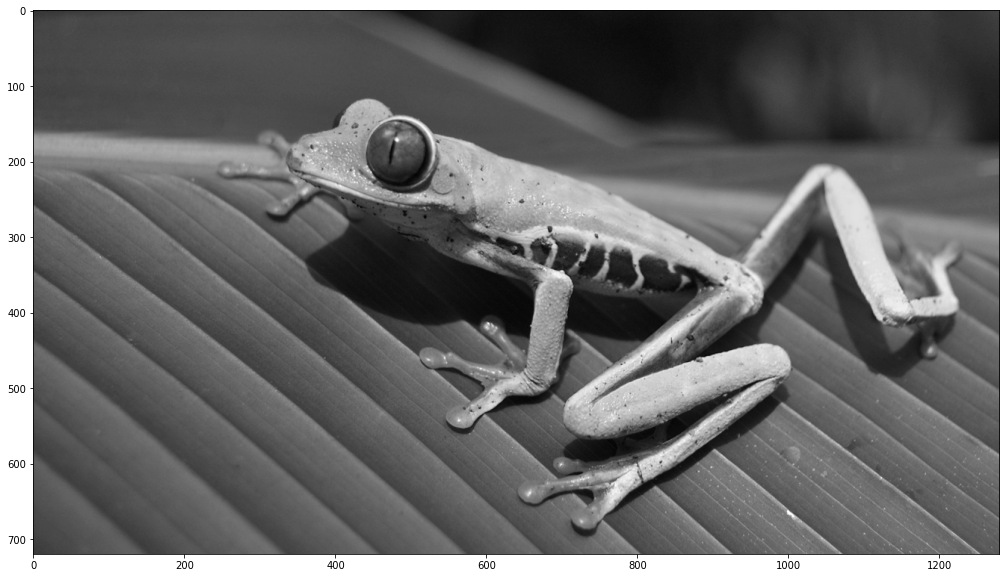

In [ ]:
plt.imshow(pop,cmap=plt.cm.gray)

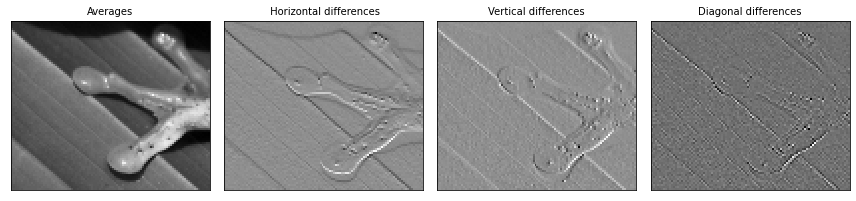

In [ ]:

# Wavelet transform of image, and plot approximation and details
titles = ['Averages', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop[400:570,450:650], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.savefig('bridge1.png', bbox_inches = 'tight', pad_inches = 0)
fig.show()

#### Simple Rotation
Rotated 35 degrees using skimage.transform.rotate

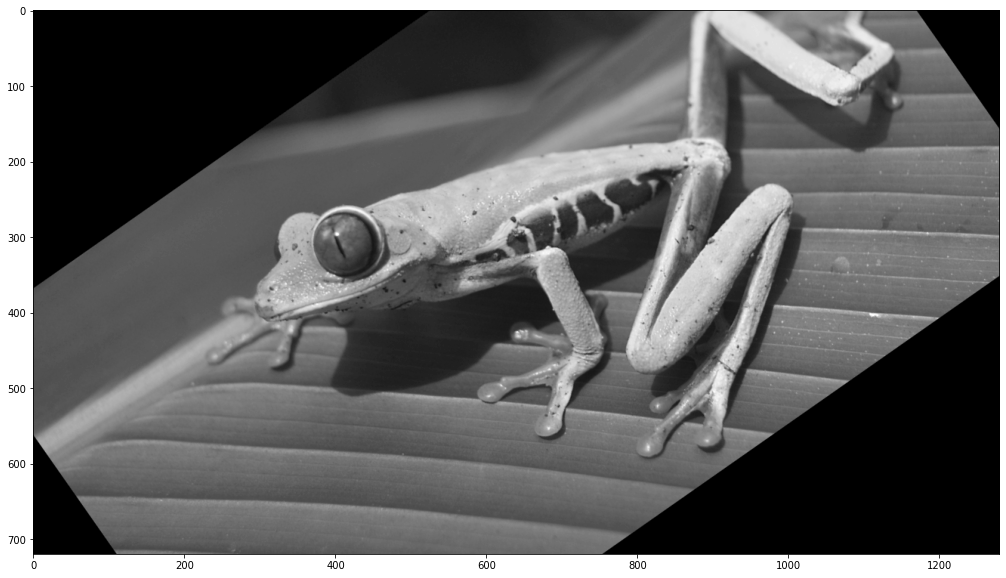

In [ ]:
rotatedImg = transform.rotate(pop,35)
plt.imshow(rotatedImg,cmap=plt.cm.gray)

#### Wavelet Transform of Rotated Image

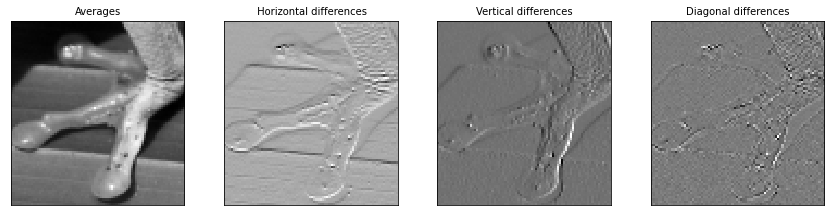

In [ ]:

# Wavelet transform of image, and plot approximation and details
titles = ['Averages', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(rotatedImg[400:570,590:750], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.savefig('bridge1.png', bbox_inches = 'tight', pad_inches = 0)
fig.show()

##### Differences in Transform Between Rotated and Unrotated Image
Looking at the same location within the rotated and unrotated images, a few differences are immediately apparent. The "crispness" of the resulting transform changes between sets.

For example: Looking only at the horizontal differences one can see that the transform of the rotated image is more blurred than that of the original, unrotated image. This is likely due to the fact that many of the prominent patterns (i.e.: the leaf) become more horizontal as the image is rotated. This results in having less horizontal changes and thus an image with less changes to show.

#### Extract RGB Color Channels and Compare Wavelet Transform

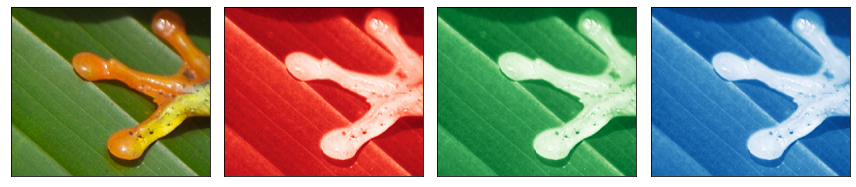

In [ ]:
img=io.imread('frog-1280x720.png')

imRd = img[400:570,450:650,0]
imGr = img[400:570,450:650,1]
imBl = img[400:570,450:650,2]

imArray = [imRd, imGr, imBl]

colorCh = ['Reds_r', 'Greens_r', 'Blues_r']

fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(1, 4, 1)
ax.imshow(img[400:570,450:650], interpolation="nearest", cmap=ch)
ax.set_xticks([])
ax.set_yticks([])

for i, ch in enumerate(colorCh):
    ax = fig.add_subplot(1, 4, i + 2)
    ax.imshow(imRd, interpolation="nearest", cmap=ch)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
fig.show()

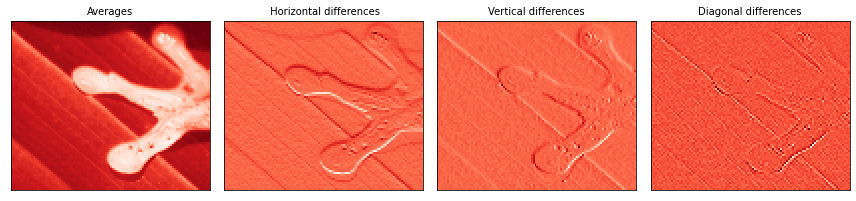

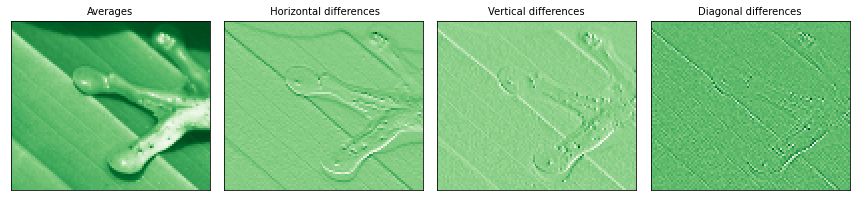

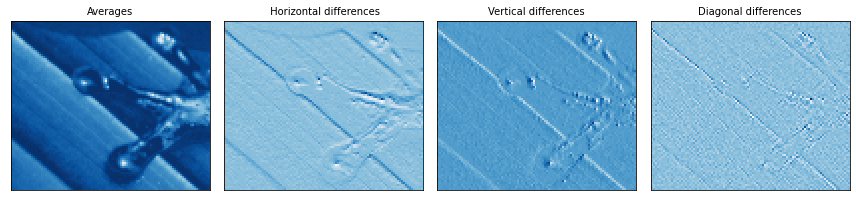

In [ ]:
for i, ch in enumerate(colorCh):
    titles = ['Averages', ' Horizontal differences',
              'Vertical differences', 'Diagonal differences']

    coeffs2 = pywt.dwt2(imArray[i], 'haar')
    LL, (LH, HL, HH) = coeffs2
    fig = plt.figure(figsize=(12, 3))

    for j, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(1, 4, j + 1)
        ax.imshow(a, interpolation="nearest", cmap=ch)
        ax.set_title(titles[j], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

    fig.tight_layout()
    fig.savefig('bridge1.png', bbox_inches = 'tight', pad_inches = 0)
    fig.show()

##### Differences in Transform Between Color Channels
It looks to be that the blue channel has less differences in any direction than either the red or green channels. The first thought is there must be a discrepancy between blue and the other channels in terms of the Bayer filter. It was possible that blue presents less frequently in the mosaic, which, if true, could be attributed to lower frequencies in the blue channel image. This doesn't seem to be the case.

One thing to note is that the red and green spectral bands are closer to each other than either are to blue. It is unclear if this is coincidence or not. It might be that the proximity of the red and green wavelengths makes it difficult for human eyes to discern contrast differences between two images.

## Sampling Parameters, Aliasing, and Lowpass Filtering


### Signal 1: Modulated Sine Wave
The Modulated Sine Wave is defined as

$$
f(x)=\sin (2\pi \left(\frac{1}{2}\right)x) \sin (2\pi (10) x)
$$

on the interval $[-1,1]$.

#### 5x over sampling

sampling rate .01, 5 times Nyquist

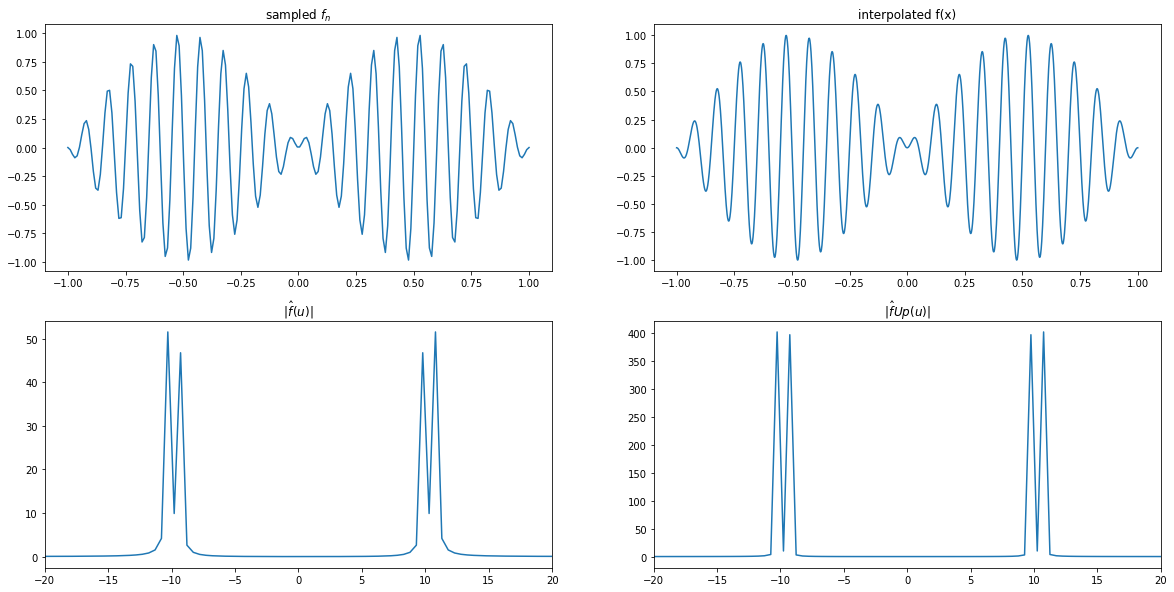

In [ ]:
def f(x):
    f=np.sin(2*np.pi*(1/2)*x)*np.sin(2*np.pi*(10)*x)
    return f

X=1
dx=.01

def plotFun(samplingRate = 0.1):
    N=np.int(2*X/samplingRate)
    B=N/(4*X)
    xrange=np.linspace(-X,X,N)
    urange=np.linspace(-B,B,N)

    # now let's make interpolated function
    fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
    plt.subplot(2,2,1)
    plt.plot(xrange,f(xrange))
    plt.title('sampled $f_n$')
    plt.subplot(2,2,2)
    xUpSample=np.linspace(-X,X,8*N)
    uUpSample=np.linspace(-B*8.,B*8.,N*8)
    plt.plot(xUpSample,fUp(xUpSample))
    plt.title('interpolated f(x)')
    plt.subplot(2,2,3)
    plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
    plt.xlim(-20,20)
    plt.title('$|{\hatf}(u)|$')
    plt.subplot(2,2,4)
    plt.plot(uUpSample,np.abs(np.fft.fftshift(np.fft.fft(fUp(xUpSample)))))
    plt.xlim(-20,20)
    plt.title('$|{\hatfUp}(u)|$')
    return

plotFun(dx)
plt.savefig('cos5XNyquist.png')

#### 1.5x over sampling

sampling rate 1/3, 3/2 times Nyquist

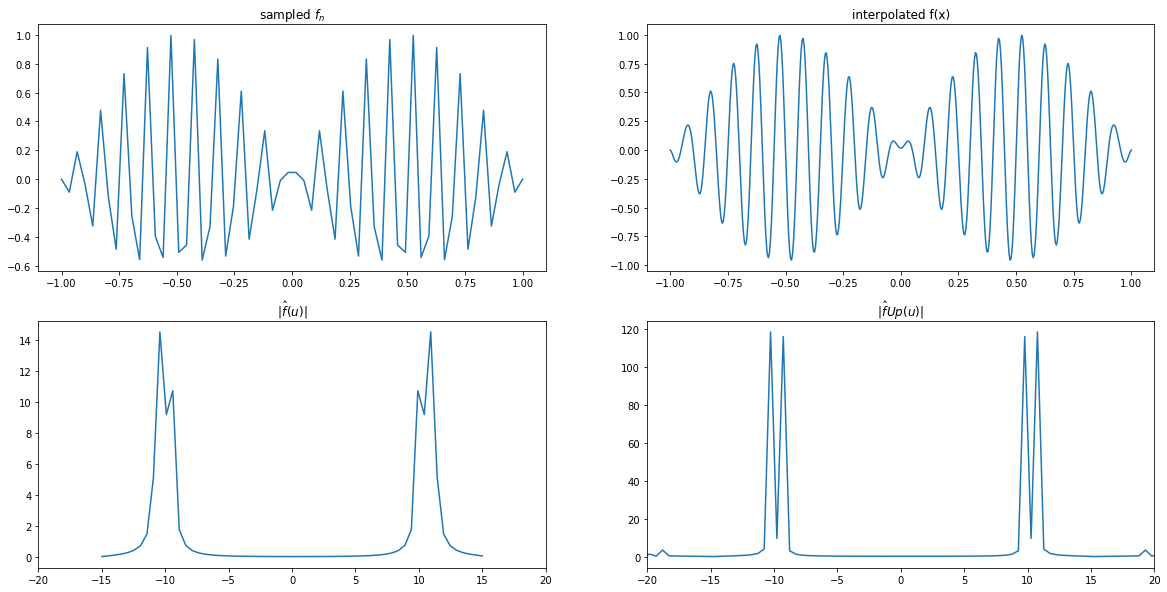

In [ ]:
dx=1/30.

plotFun(dx)

plt.savefig('cos1p5XNyquist.png')

#### 1.1x over sampling

sampling rate .5/1.1, 1.1 times Nyquist

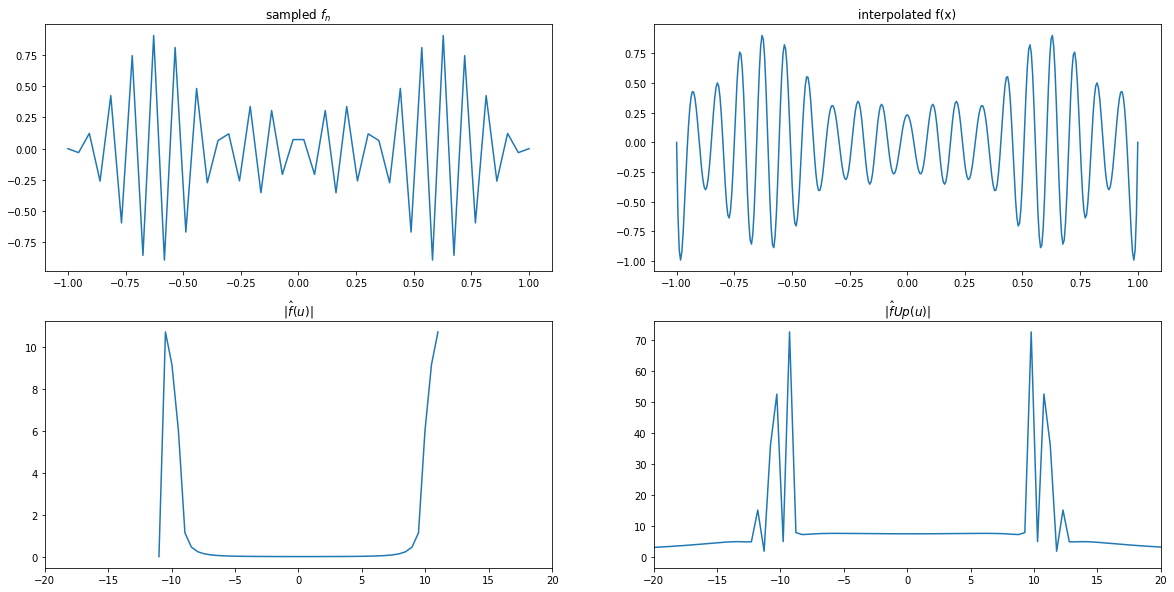

In [ ]:
dx=1/22

plotFun(dx)

plt.savefig('cos1p1XNyquist.png')

#### 1.3x under sampling

sampling rate .5$\times$1.3, 1.1 times Nyquist

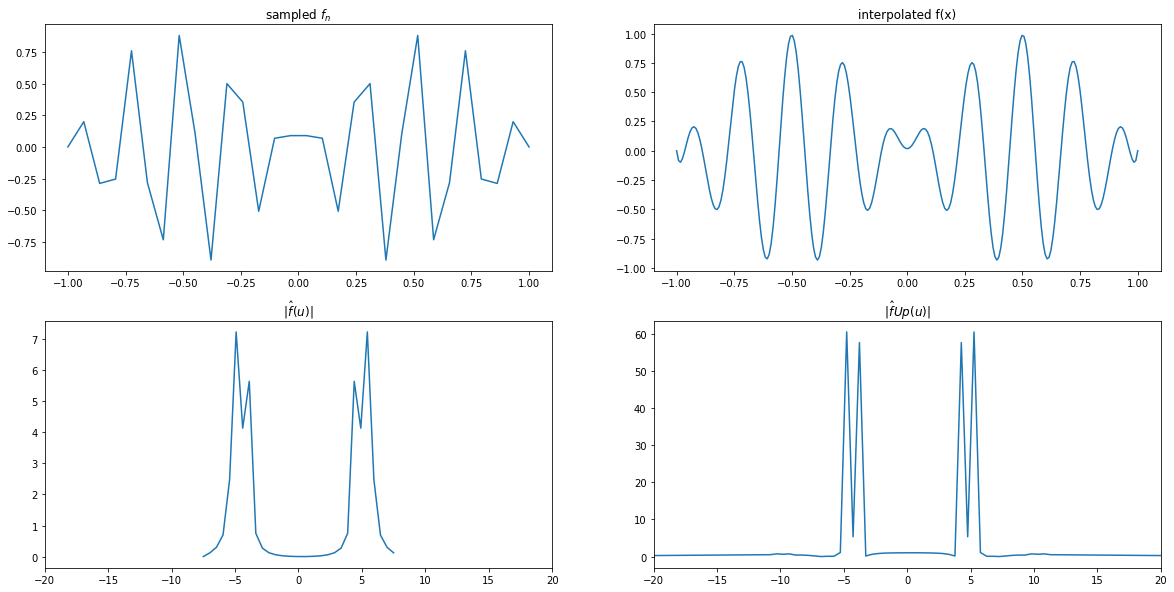

In [ ]:
dx=.05*1.3

plotFun(dx)

plt.savefig('cos1p3uNyquist.png')

### Remarks on Aliasing

The signal above represents a 10Hz sine wave modulated by a 0.5Hz sine wave. In the frequency response of the 5x oversampled case, one can see 0.5Hz sidebands surrounding the 10Hz center frequency.

In the ideal case of Nyquist sampling, where the highest present frequency is known, an oversampling rate of 1x is sufficient to fully reconstruct the signal. This is only ideal, however, and in this example is clearly not the case.

One can see from the 1.5x oversampling case that aliasing effects begin to appear even though the rate of 30Hz is well above 2x the highest frequency in the function, 20Hz. When analyzing the DFT it becomes clear there are frequencies present greater than 10Hz. These frequencies appear in the form of energy that "leaks" away from the modes and are the unavoidable result of a discrete representation of a signal. Nonetheless, these frequencies can be aliased if they are not accounted for in the sampling rate.

As the sampling rate approaches 1x Nyquist, the effects of aliasing due to leakage become more pronounced. The time/spatial domain representation deteriorates as well as the sideband energy in the frequency domain.

When the signal is undersampled aliasing overcomes the center frequency and cuts it in half, from 10Hz to 5Hz. The sidebands also move as a consequence of undersampling.

### Remarks on Interpolation

The interpolating spline seems to do a good job of recovering the degraded signal when in the presence aliasing. Of particular note, when looking at DFT of the interpolated signal, is the restoration of sideband energy. Even when the signal is undersampled the interpolation does a good job of recovering the sidebands, albeit with lower energy.

This might be a result of the interpolating spline smoothing out sharp peaks in the 10Hz sine wave that were introduced during subsampling. These peaks are responsible for forming the shape of the modulating sine wave.


## Effect of finite pixel size

In [ ]:
def gn(delta=1):
  N=np.int(2*X/delta)
  gg=np.zeros(N)
  for pop in np.arange(len(gg)):
    gg[pop]=integrate.quad(f,(-X+pop*delta),(-X+(pop+1)*delta))[0]
  return gg


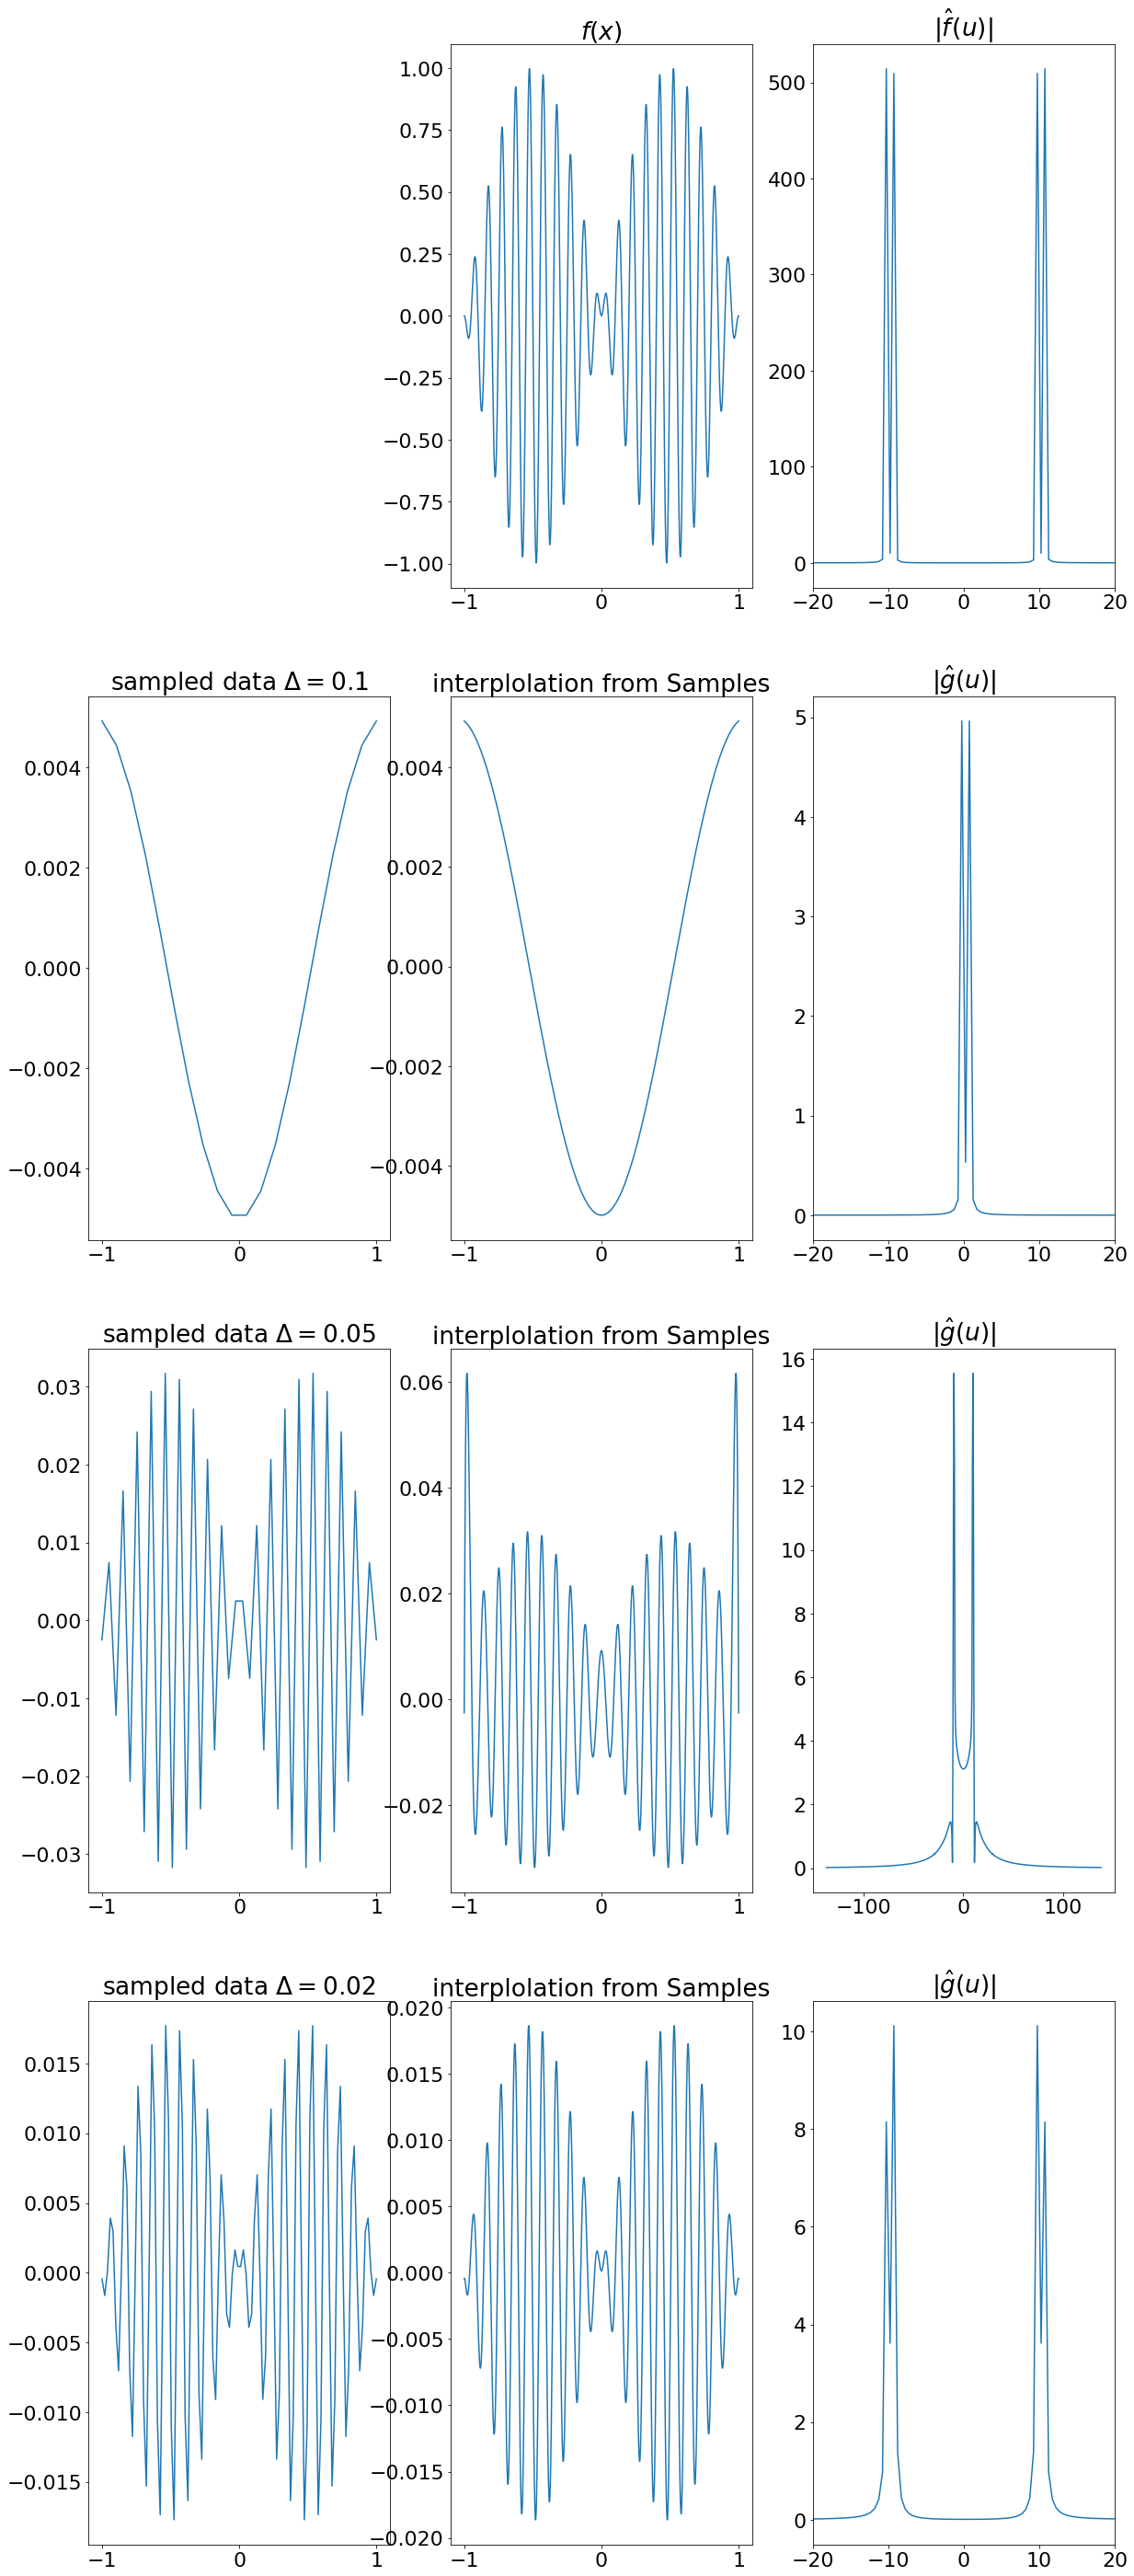

In [ ]:
plt.rcParams['figure.figsize'] = [20, 50]
xrange=np.linspace(-X,X,2048)
urange=np.linspace(-2048/(4*X),2048/(4*X),2048)

plt.subplot(4,3,2)
plt.plot(xrange,f(xrange))
plt.title('$f(x)$')
plt.subplot(4,3,3)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(f(xrange))))[750:1300])
plt.xlim(-20,20)
plt.title('$|{\hatf}(u)|$')
plt.subplot(4,3,4)

sampleRate = 0.1
gN=gn(sampleRate)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=%1.1f$' %sampleRate)
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,5)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,6)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.xlim(-20,20)
plt.title('$|{\hatg}(u)|$')
plt.subplot(4,3,7)

sampleRate = 0.05
gN=gn(sampleRate)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=%1.2f$' %sampleRate)
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,8)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,9)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hatg}(u)|$')
plt.subplot(4,3,10)


sampleRate = 0.02
gN=gn(sampleRate)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=%1.2f$' %sampleRate)
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,11)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,12)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.xlim(-20,20)
plt.title('$|{\hatg}(u)|$')
plt.savefig('sampleFiltering.png')

### Remarks

By looking at the definition of the pixel width/response model
$$
g(x)=\int f(x')h(x-x') dx,~h(x)={\rm rect}\left (\frac{x}{\Delta}\right )
$$
it is clear that averaging, or low pass filtering, will take place. Low pass-filtering effects can be seen in the plots of 
$$
f(x)=\sin (2\pi \left(\frac{1}{2}\right)x) \sin (2\pi (10) x)
$$
for $\Delta=0.1,0.05,0.02$. As the pixel width is increased and more high-frequency energy is averaged, more of the 10Hz center frequency is filtered out. The distinct 10Hz peaks in the DFT start to merge until the 10Hz energy is completely filtered out and only the 0.5Hz signal remains.

Although the pixel response model is different than trivial sampling, it still obeys the same Shannon-Nyquist sampling theorem for perfect signal reconstruction. In order to completely reconstruct a signal, the low pass filter that is the rect function must allow through its bandpass the highest frequency in the signal.


# Spectral Analysis

### 0 0.25 0.5 0.75 1 0.75 0.5 0.25 0

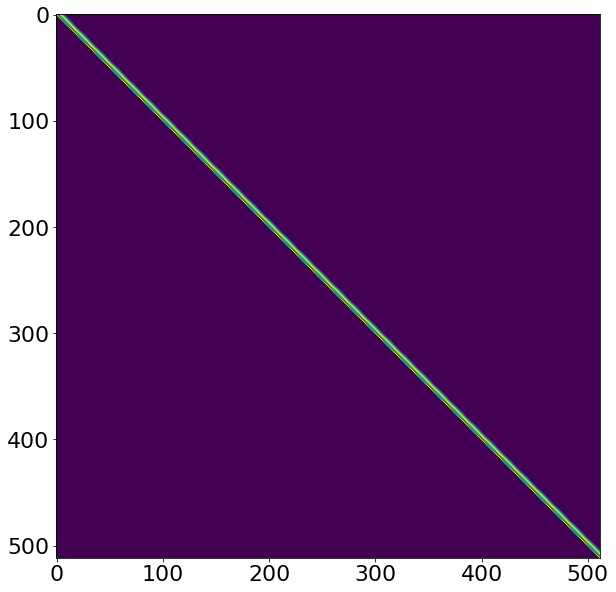

In [ ]:
#
from scipy.linalg import toeplitz
psf=[0,0.25,0.5,0.75,1,0.75,0.5,0.25,0]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




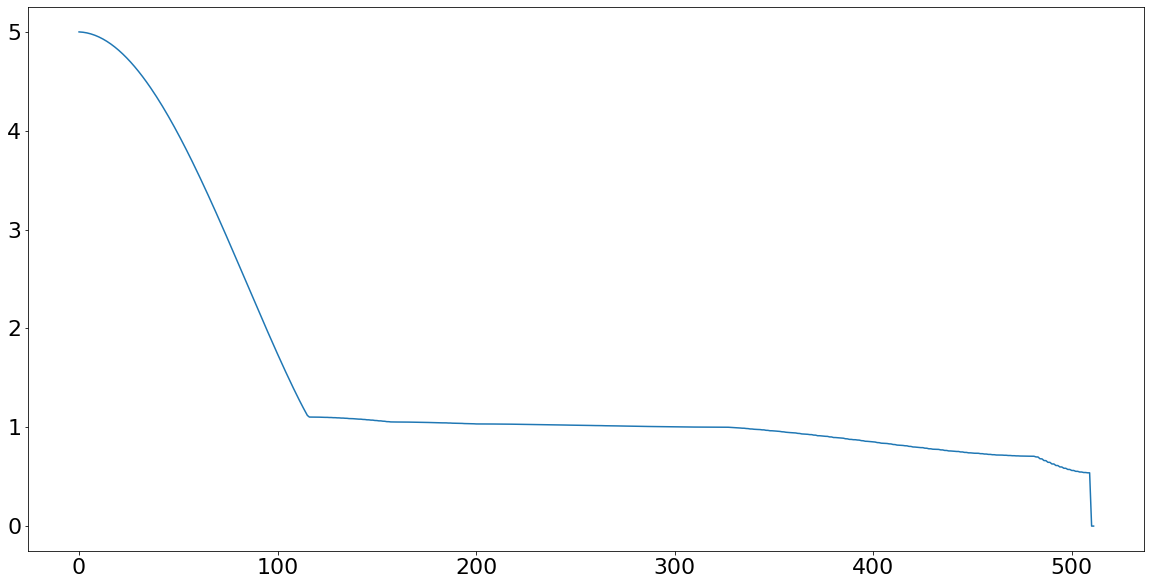

In [ ]:
plt.plot(s)
plt.savefig('triangleSpectrum.png')

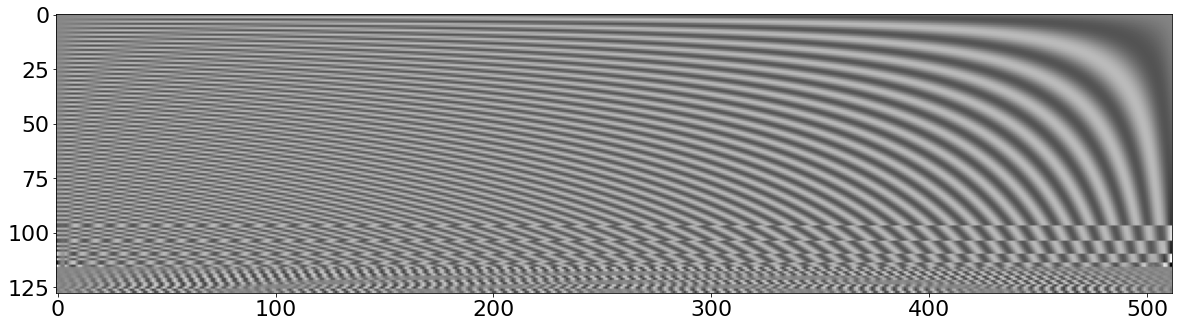

In [ ]:
plt.imshow(vh[0:128,:],cmap='gray')
plt.savefig('triangleVectors.png')

### Normal Gaussian

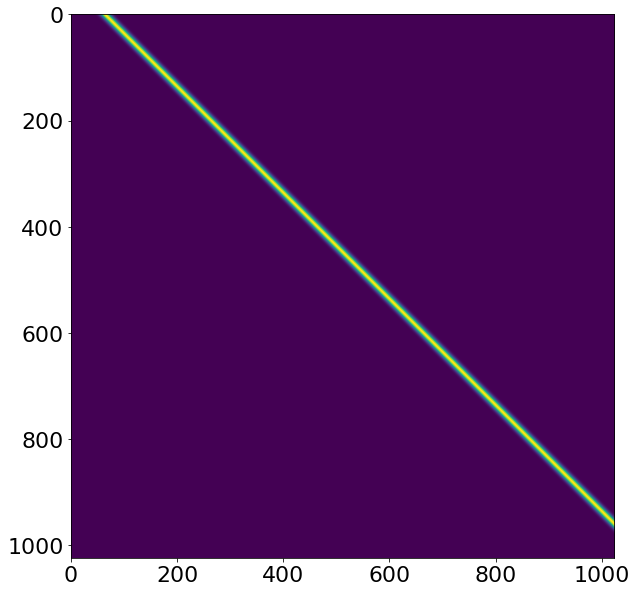

In [ ]:
#
from scipy.linalg import toeplitz

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

psf=gaussian(np.linspace(-10,10,128),0,1)
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




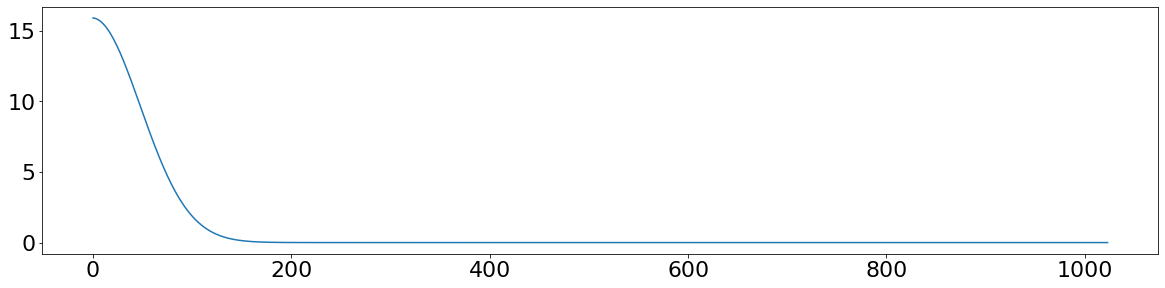

In [ ]:
plt.subplot(2,1,1)
plt.plot(s)

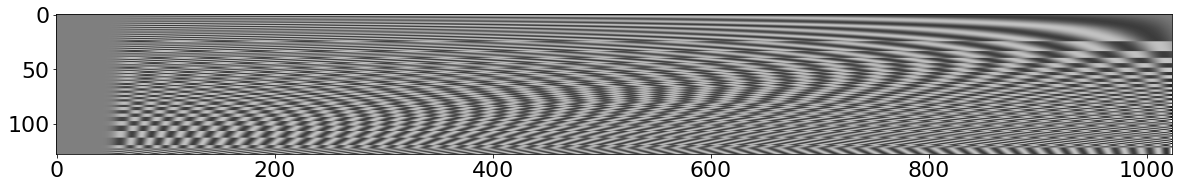

In [ ]:
plt.imshow(vh[0:128,:],cmap='gray')
plt.savefig('gaussianVectors.png')

### sinc$^3$

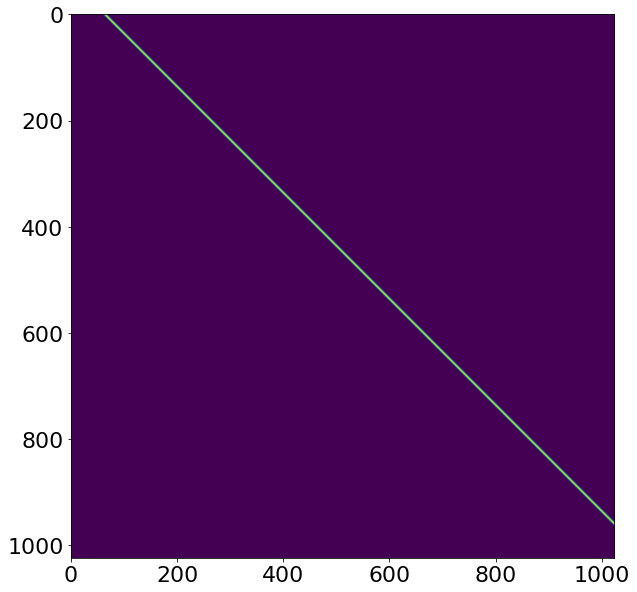

In [ ]:
#
from scipy.linalg import toeplitz
psf=np.abs(np.sinc(np.linspace(-10,10,128)))**3
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)



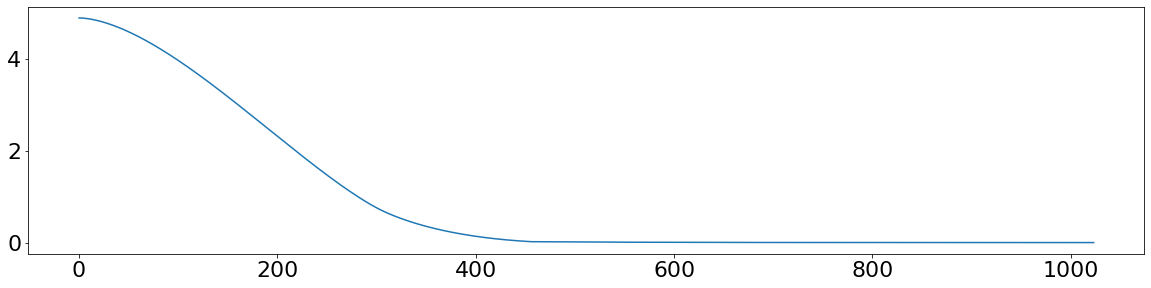

In [ ]:
plt.subplot(2,1,1)
plt.plot(s)
plt.savefig('sinc3Spectrum.png')

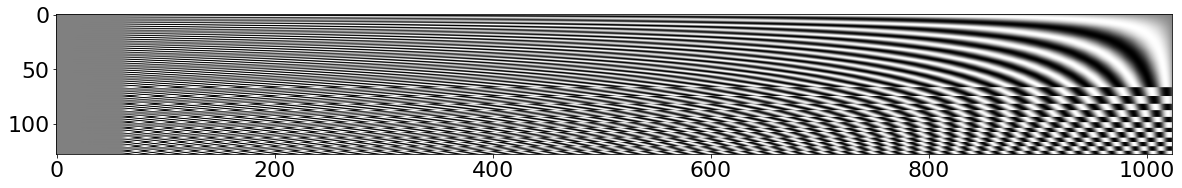

In [ ]:
plt.imshow(vh[0:128,:],cmap='gray')
